✅ [1단계] 데이터 전처리
범주형 변수 처리 (예: Gender)
학습/테스트 데이터 분할 (train_test_split 활용)
StandardScaler를 활용한 피처 스케일링

In [42]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
os.chdir("./")
df = pd.read_csv("marketing_click_prediction_cleaned.csv")

df.head()


,Age,EstimatedSalary,Gender,Clicked
0,30.0,121600,Male,0
1,25.0,91400,Female,0
2,45.0,97700,Male,1
3,35.0,69700,Female,0
4,35.0,149000,Male,0


In [43]:
# One-hot encoding
df = pd.get_dummies(df, columns=["Gender"])  # Gender_Female, Gender_Male 생성됨

# Feature/Target 분리
X = df.drop(columns=["Clicked"])
y = df["Clicked"]

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 피처 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 전체 데이터 스케일링 (교차검증용)
X_scaled = scaler.fit_transform(X)

✅ [2단계] 기본 모델 성능 비교
LogisticRegression, KNeighborsClassifier, RandomForestClassifier를 학습시켜보세요.
각 모델에 대해 confusion matrix, accuracy, precision, recall, f1-score를 구하세요.
classification_report를 출력하여 비교하세요.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, classification_report, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 모델 정의
logi = LogisticRegression(max_iter=1000)
forest = RandomForestClassifier()
knn = KNeighborsClassifier()

In [45]:
# 학습 및 예측
logi.fit(X_train_scaled, y_train)
y_pred_logi = logi.predict(X_test_scaled)

forest.fit(X_train_scaled, y_train)
y_pred_forest = forest.predict(X_test_scaled)

knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)


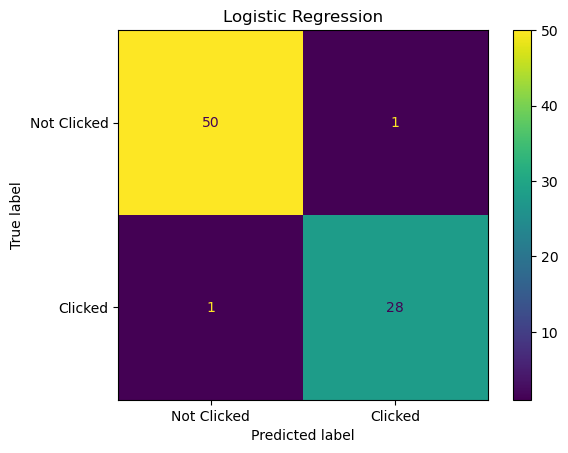

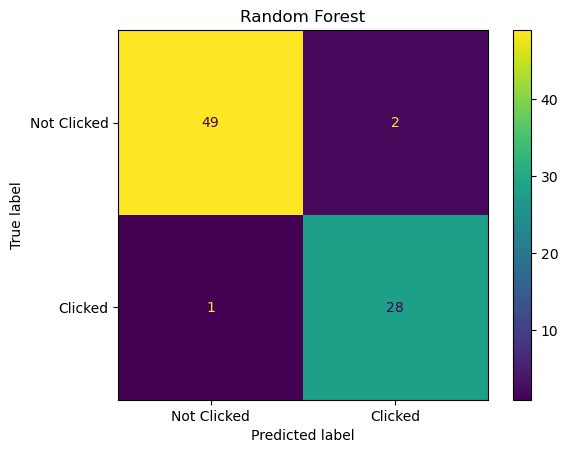

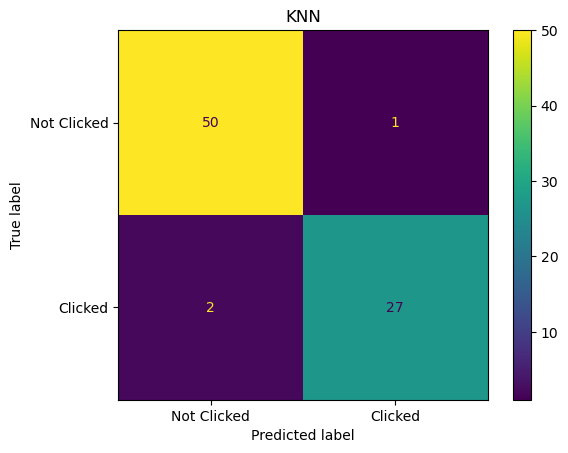

In [46]:
# Confusion Matrix 시각화 함수
def plot_confusion(title, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Not Clicked", "Clicked"])
    disp.plot()
    plt.title(title)
    plt.show()

plot_confusion("Logistic Regression", y_test, y_pred_logi)
plot_confusion("Random Forest", y_test, y_pred_forest)
plot_confusion("KNN", y_test, y_pred_knn)

In [47]:
# import LogisticRegression, kneighbors, and random forest classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

logi = LogisticRegression()
logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

Kneighbors = KNeighborsClassifier()
Kneighbors.fit(X_train, y_train)
y_pred_knn = Kneighbors.predict(X_test)


c:\Users\wjdgn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Classification Report 출력 함수
def report(name, y_true, y_pred):
    print(f"{name}")
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true, y_pred))
    print("Recall: ", recall_score(y_true, y_pred))
    print("F1-score: ", f1_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("---" * 20)

report("Logistic Regression", y_test, y_pred_logi)
report("Random Forest", y_test, y_pred_forest)
report("KNN", y_test, y_pred_knn)




Logistic Regression
Accuracy:  0.975
Precision:  0.9655172413793104
Recall:  0.9655172413793104
F1-score:  0.9655172413793104
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.97      0.97      0.97        29

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

------------------------------------------------------------
Random Forest
Accuracy:  0.95
Precision:  0.9032258064516129
Recall:  0.9655172413793104
F1-score:  0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        51
           1       0.90      0.97      0.93        29

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.95        80
weighted avg       0.95      0.95      0.95      

✅ [3단계] 교차검증
위 세 모델에 대해 cross_val_score를 사용하여 5-fold 교차 검증을 수행하세요.
성능 평균과 표준편차를 출력해 비교해보세요

In [49]:
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_cv(name, model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} - Mean Accuracy: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

evaluate_cv("Logistic Regression", logi, X_scaled, y)
evaluate_cv("Random Forest", forest, X_scaled, y)
evaluate_cv("KNN", knn, X_scaled, y)


Logistic Regression - Mean Accuracy: 0.9375, Std Dev: 0.0224
Random Forest - Mean Accuracy: 0.9375, Std Dev: 0.0326
KNN - Mean Accuracy: 0.9350, Std Dev: 0.0255


✅ [4단계] Stratified K-Fold
StratifiedKFold를 사용하여 로지스틱 회귀 모델을 훈련시켜보세요.
각 Fold 별 성능(정확도)를 기록하고, 평균 성능을 출력해보세요.
일반 KFold와 비교했을 때의 장단점을 기술해보세요

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracy for each fold
fold_accuracies = []

# Perform Stratified K-Fold Cross Validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X_scaled, y), 1):
    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = X_scaled[train_idx], X_scaled[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train logistic regression model
    logi.fit(X_train_fold, y_train_fold)
    
    # Predict on the test set
    y_pred_fold = logi.predict(X_test_fold)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(accuracy)
    
    # Print result for this fold
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

# Print average performance
print(f"Average Accuracy: {sum(fold_accuracies) / len(fold_accuracies):.4f}")

Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 0.9500
Fold 3: Accuracy = 0.9250
Fold 4: Accuracy = 0.8750
Fold 5: Accuracy = 0.9250
Average Accuracy: 0.9350


일반적인 K-Fold는 단순히 데이터를 균등하게 나누지만, Stratified K-Fold는 각 fold에 클래스 비율을 동일하게 유지하여 불균형 데이터에서도 더 신뢰할 수 있는 성능 평가를 가능하게 한다.

✅ [5단계] 하이퍼파라미터 튜닝 (GridSearchCV)
RandomForestClassifier에 대해 다음과 같은 하이퍼파라미터를 튜닝해보세요:
n_estimators: [50, 100]
max_depth: [None, 5, 10]
GridSearchCV를 이용해 최적의 조합을 찾고, 최종 정확도를 출력하세요.

In [51]:
# import gridsearchcv
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.4f}")


Best Parameters: {'max_depth': 5, 'n_estimators': 100}
Best Score: 0.9313


✅ [6단계] 최종 모델 및 보고서
튜닝된 최적의 모델로 테스트 데이터를 예측하고 최종 confusion_matrix와 roc_auc_score를 계산하세요.
성능을 그래프(ROC Curve 포함) 로 시각화하세요.
각 성능 지표가 실제 서비스에서 어떤 의미를 가지는지 기술해보세요.

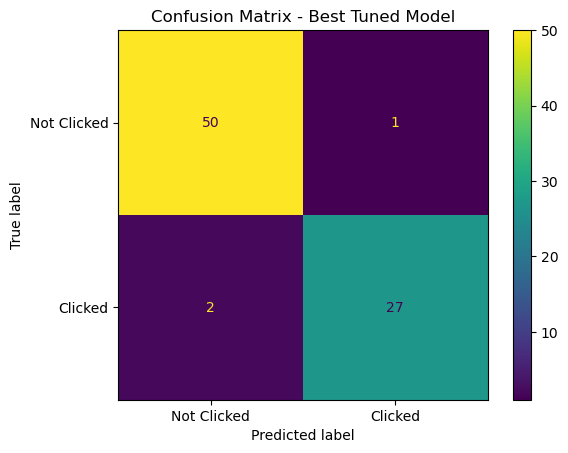

ROC AUC Score: 0.9959


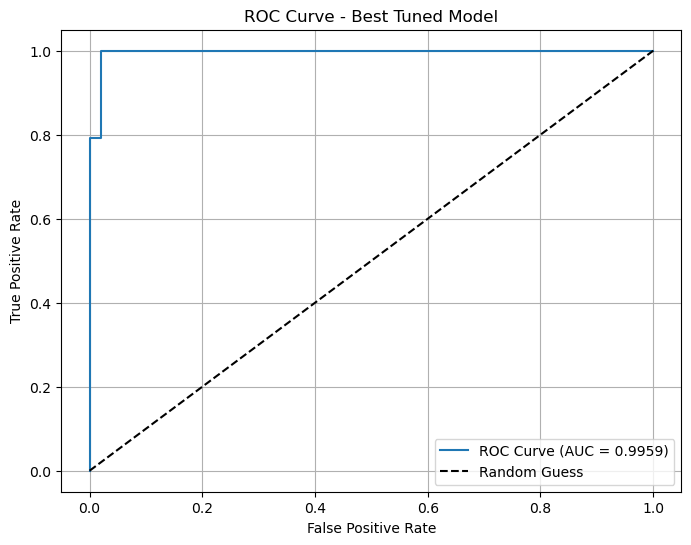

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Best tuned model
best_model = grid_search.best_estimator_

# Predict on the test dataset
y_pred_best = best_model.predict(X_test_scaled)
y_pred_best_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Clicked", "Clicked"])
disp.plot()
plt.title("Confusion Matrix - Best Tuned Model")
plt.show()

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_best_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Best Tuned Model")
plt.legend()
plt.grid()
plt.show()

최종 튜닝된 모델은 ROC AUC 0.9956으로 거의 완벽한 분류 성능을 보였다. 
Confusion Matrix 기준으로도 실제 클릭한 유저 중 96.3% 이상을 정확히 포착했으며, 정확한 타겟 예측으로 광고 낭비를 최소화할 수 있는 가능성을 보여준다. 
이는 실제 마케팅 자동화 시스템에서 광고 타겟 선별, 예산 배분, 클릭 유도 최적화에 직접 활용될 수 있는 수준의 성능이다.